# Question 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

weather = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

weather.head(10)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222,7.111,0.850,13.959,258.000,14.957,0.000,1016.660,Partly cloudy throughout the day.
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733,5.522,0.950,12.365,259.000,9.982,0.000,1016.720,Partly cloudy throughout the day.
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772,6.528,0.890,14.152,260.000,9.982,0.000,1016.840,Partly cloudy throughout the day.
8,2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.822,10.822,0.820,11.318,259.000,9.982,0.000,1017.370,Partly cloudy throughout the day.
9,2006-04-01 07:00:00+00:00,Partly Cloudy,rain,13.772,13.772,0.720,12.526,279.000,9.982,0.000,1017.220,Partly cloudy throughout the day.


In [2]:
feature_list = ['humidity','windspeed','windbearing']

X = weather.loc[:,[feature for feature in feature_list]].values.tolist()
Y = weather.temperature

In [3]:
model = linear_model.LinearRegression()
model.fit(X,Y)

prediction = model.predict(X)
df = pd.DataFrame({'Actual': Y, 'Predicted': prediction})
df.head()

,Actual,Predicted
0,9.472,6.486
1,9.356,7.464
2,9.378,8.342
3,8.289,8.511
4,8.756,9.085


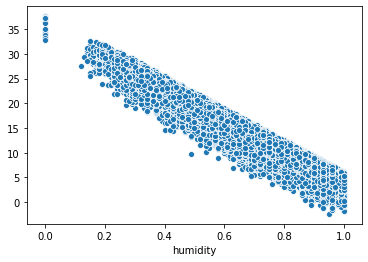

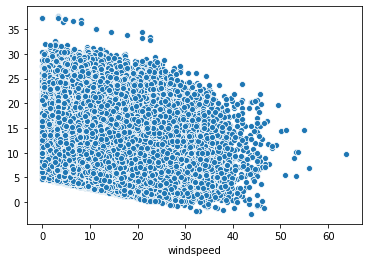

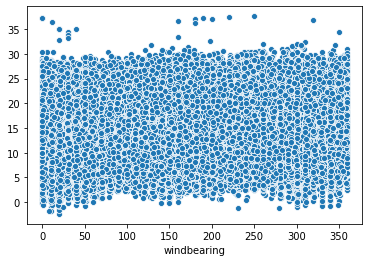

In [4]:
for feature in feature_list:
    sns.scatterplot(weather[feature],prediction)
    plt.show()

In [5]:
errors = Y - prediction

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: 1.6108163235612565e-12


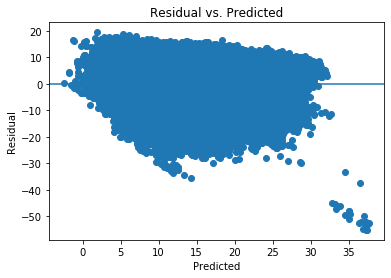

In [6]:
plt.scatter(prediction, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [7]:
weather.corr()

,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure
temperature,1.000,0.993,-0.632,0.009,0.030,0.393,nan,-0.005
apparenttemperature,0.993,1.000,-0.603,-0.057,0.029,0.382,nan,-0.000
humidity,-0.632,-0.603,1.000,-0.225,0.001,-0.369,nan,0.005
windspeed,0.009,-0.057,-0.225,1.000,0.104,0.101,nan,-0.049
windbearing,0.030,0.029,0.001,0.104,1.000,0.048,nan,-0.012
visibility,0.393,0.382,-0.369,0.101,0.048,1.000,nan,0.060
loudcover,nan,nan,nan,nan,nan,nan,nan,nan
pressure,-0.005,-0.000,0.005,-0.049,-0.012,0.060,nan,1.000


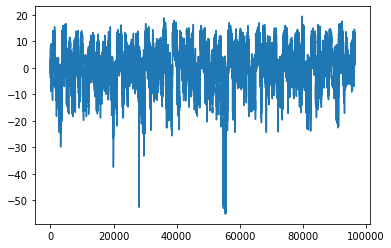

In [8]:
plt.plot(errors)
plt.show()

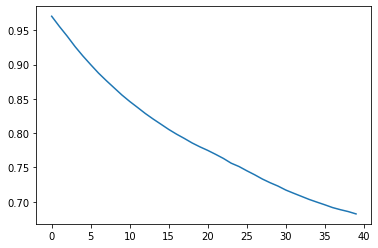

In [9]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

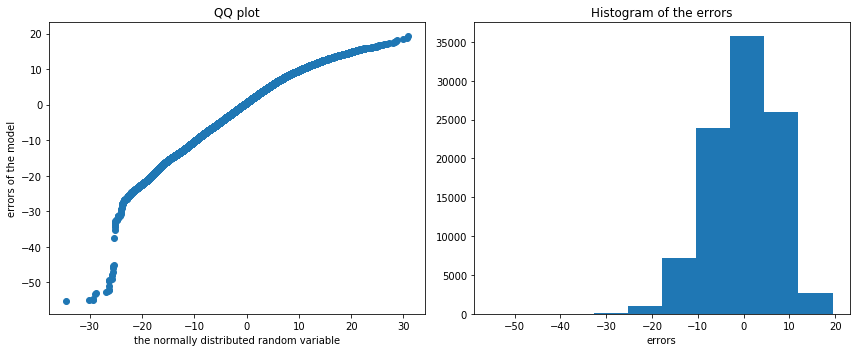

In [10]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

# Question 2

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_prices = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()


In [12]:
clean_house_prices = house_prices.dropna(axis=1)

In [13]:
clean_house_prices.head()

,id,mssubclass,mszoning,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,...,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [14]:
clean_house_prices.corr()

,id,mssubclass,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
id,1.000,0.011,-0.033,-0.028,0.013,-0.013,-0.022,-0.005,-0.006,-0.008,...,-0.030,-0.000,0.003,-0.047,0.001,0.057,-0.006,0.021,0.001,-0.022
mssubclass,0.011,1.000,-0.140,0.033,-0.059,0.028,0.041,-0.070,-0.066,-0.141,...,-0.013,-0.006,-0.012,-0.044,-0.026,0.008,-0.008,-0.014,-0.021,-0.084
lotarea,-0.033,-0.140,1.000,0.106,-0.006,0.014,0.014,0.214,0.111,-0.003,...,0.172,0.085,-0.018,0.020,0.043,0.078,0.038,0.001,-0.014,0.264
overallqual,-0.028,0.033,0.106,1.000,-0.092,0.572,0.551,0.240,-0.059,0.308,...,0.239,0.309,-0.114,0.030,0.065,0.065,-0.031,0.071,-0.027,0.791
overallcond,0.013,-0.059,-0.006,-0.092,1.000,-0.376,0.074,-0.046,0.040,-0.137,...,-0.003,-0.033,0.070,0.026,0.055,-0.002,0.069,-0.004,0.044,-0.078
yearbuilt,-0.013,0.028,0.014,0.572,-0.376,1.000,0.593,0.250,-0.049,0.149,...,0.225,0.189,-0.387,0.031,-0.050,0.005,-0.034,0.012,-0.014,0.523
yearremodadd,-0.022,0.041,0.014,0.551,0.074,0.593,1.000,0.128,-0.068,0.181,...,0.206,0.226,-0.194,0.045,-0.039,0.006,-0.010,0.021,0.036,0.507
bsmtfinsf1,-0.005,-0.070,0.214,0.240,-0.046,0.250,0.128,1.000,-0.050,-0.495,...,0.204,0.112,-0.102,0.026,0.062,0.140,0.004,-0.016,0.014,0.386
bsmtfinsf2,-0.006,-0.066,0.111,-0.059,0.040,-0.049,-0.068,-0.050,1.000,-0.209,...,0.068,0.003,0.037,-0.030,0.089,0.042,0.005,-0.015,0.032,-0.011
bsmtunfsf,-0.008,-0.141,-0.003,0.308,-0.137,0.149,0.181,-0.495,-0.209,1.000,...,-0.005,0.129,-0.003,0.021,-0.013,-0.035,-0.024,0.035,-0.041,0.214


In [15]:
feature_list = ['overallqual','totalbsmtsf','firstflrsf','grlivarea','garagecars','garagearea']

X = clean_house_prices.loc[:,[feature for feature in feature_list]].values.tolist()
Y = clean_house_prices.saleprice

In [16]:
model2 = linear_model.LinearRegression()
model2.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
prediction = model2.predict(X)
df = pd.DataFrame({'Actual': Y, 'Predicted': prediction})
df.head()

,Actual,Predicted
0,208500,207136.372
1,181500,176885.986
2,223500,213630.455
3,140000,222161.280
4,250000,281485.447


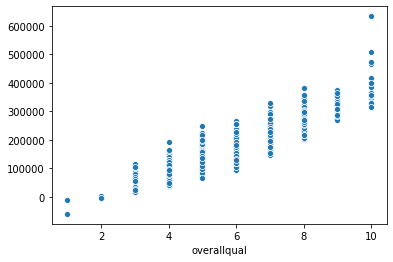

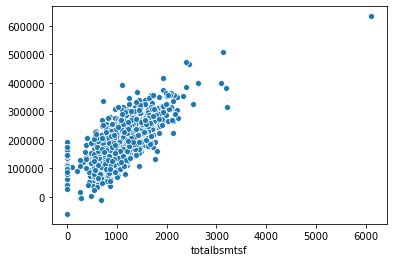

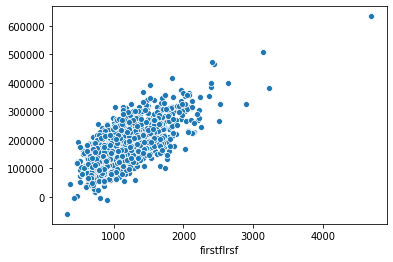

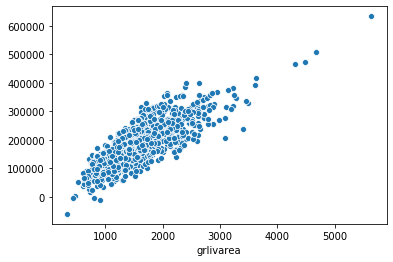

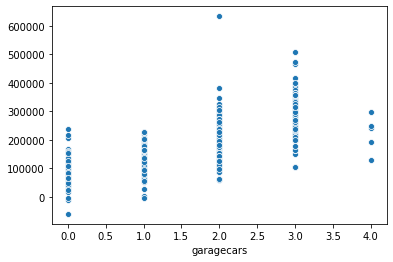

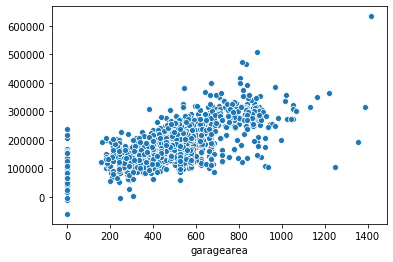

In [18]:
for feature in feature_list:
    sns.scatterplot(clean_house_prices[feature],prediction)
    plt.show()

In [19]:
errors = Y - prediction

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: -1.0884035225600413e-11


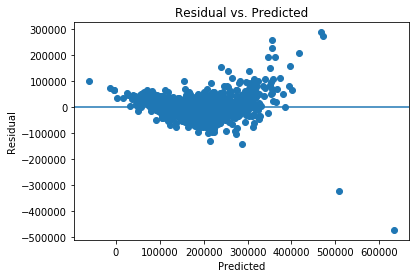

In [20]:
plt.scatter(prediction, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

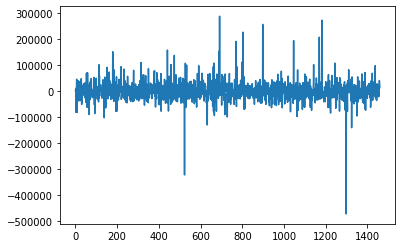

In [21]:
plt.plot(errors)
plt.show()

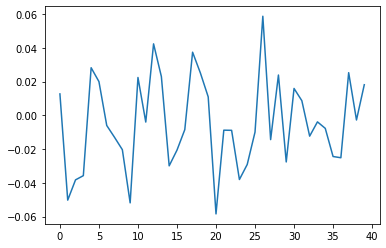

In [22]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

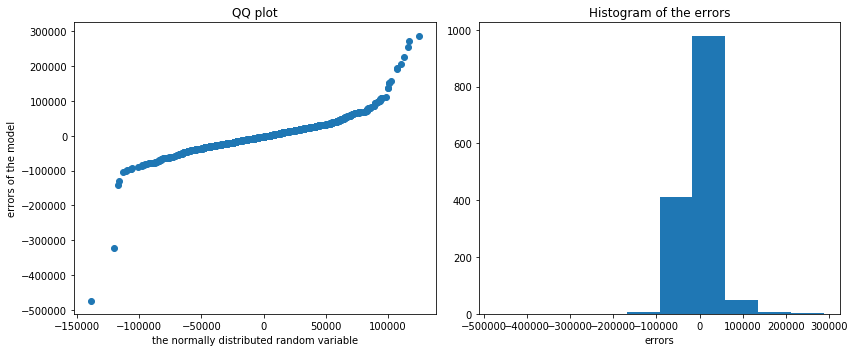

In [23]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()